In [203]:
import sys
import os

ruta_raiz = os.path.abspath('..')
if ruta_raiz not in sys.path:
    sys.path.append(ruta_raiz)

In [204]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from visualization.data_generator.bar_generator import generate_bar_plot_data
import json

DATA_PATH = "../data"
VIS_PATH = "../visualization/visualization_data"

In [205]:
relevant_surnames = pd.read_csv(f"{DATA_PATH}/most_relevant_directors_surnames.csv")
relevant_surnames

,Nombre_empresa,Apellido,conteo
0,AD RETAIL S.A.,SANTA CRUZ,3
1,ADMINISTRADORA DE FONDOS DE PENSIONES CUPRUM S.A.,INFANTE,3
2,ADMINISTRADORA DE FONDOS DE PENSIONES HABITAT ...,BARROS,2
3,ADMINISTRADORA DE FONDOS DE PENSIONES HABITAT ...,JARAMILLO,2
4,ADMINISTRADORA DE FONDOS DE PENSIONES HABITAT ...,PRIETO,2
...,...,...,...
593,WEG ADMINISTRADORA GENERAL DE FONDOS S.A.,ALVAREZ,2
594,WEG ADMINISTRADORA GENERAL DE FONDOS S.A.,BULNES,2
595,XLC ADMINISTRADORA GENERAL DE FONDOS S.A.,ALVAREZ,2
596,ZONA FRANCA DE IQUIQUE S.A.,GONZALEZ,2


#### **Cantidad de empresas relacionadas a cada apellido**

In [206]:
companies_by_each_surname = relevant_surnames.groupby("Apellido").size().reset_index(name="Cantidad de empresas")
companies_by_each_surname.sort_values("Cantidad de empresas", ascending=False, inplace=True)
companies_by_each_surname.head()

,Apellido,Cantidad de empresas
65,GARCIA,24
93,LARRAIN,23
72,GONZALEZ,17
58,FERNANDEZ,16
187,VIAL,16


In [207]:
companies_by_each_surname.shape

(191, 2)

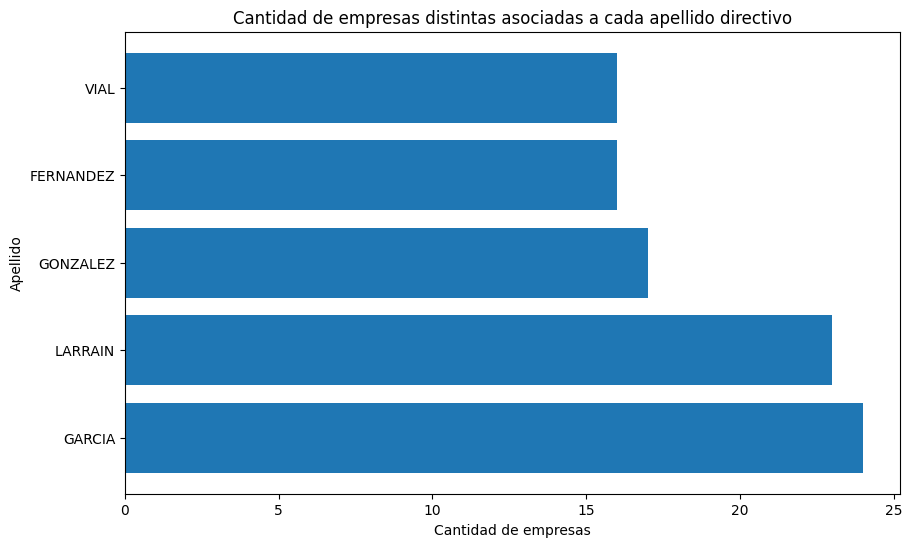

In [208]:
top_k = 5
companies_by_each_surname = companies_by_each_surname.head(top_k)
companies_by_each_surname.to_csv(f"{DATA_PATH}/top_companies_by_each_surname.csv", index=False)
plt.figure(figsize=(10, 6))
plt.barh(companies_by_each_surname["Apellido"], companies_by_each_surname["Cantidad de empresas"])
plt.xlabel("Cantidad de empresas")
plt.ylabel("Apellido")
plt.title(f"Cantidad de empresas distintas asociadas a cada apellido directivo")
plt.show()

In [209]:
generate_bar_plot_data(
    df=companies_by_each_surname,
    label_column="Apellido",
    count_column="Cantidad de empresas",
    path_to_save=f"{VIS_PATH}/top_companies_by_each_surname.json"
)

#### **Cantidad de apellidos relacionados a cada empresa**

In [210]:
surnames_by_company = relevant_surnames.groupby("Nombre_empresa").size().reset_index(name="Cantidad de apellidos")
surnames_by_company.sort_values("Cantidad de apellidos", ascending=False, inplace=True)
surnames_by_company.head()

,Nombre_empresa,Cantidad de apellidos
47,CEMENTO POLPAICO S.A.,11
71,COMPAÑIA SUD AMERICANA DE VAPORES S.A.,7
231,SOCIEDAD CONCESIONARIA VESPUCIO NORTE EXPRESS ...,7
73,CONSORCIO FINANCIERO S.A.,7
67,COMPAÑIA ELECTRICA DEL LITORAL S.A.,6


In [211]:
surnames_by_company.shape

(282, 2)

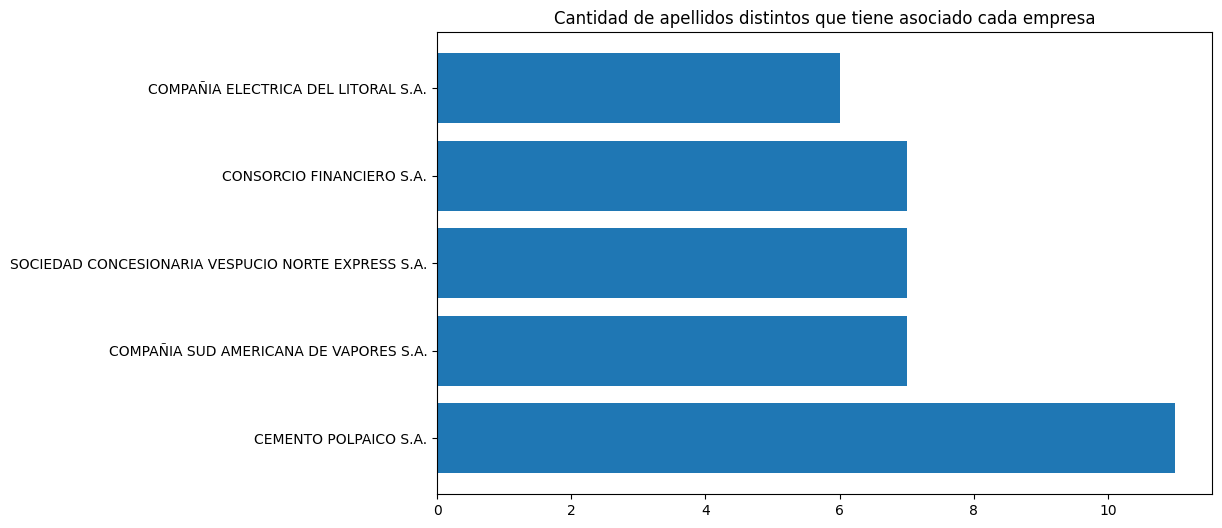

In [212]:
top_k = 5
surnames_by_company = surnames_by_company.head(top_k)
surnames_by_company.to_csv(f"{DATA_PATH}/top_surnames_by_company.csv", index=False)
plt.figure(figsize=(10, 6))
plt.barh(surnames_by_company["Nombre_empresa"], surnames_by_company["Cantidad de apellidos"])
plt.title("Cantidad de apellidos distintos que tiene asociado cada empresa")
plt.show()

In [213]:
generate_bar_plot_data(
    df=surnames_by_company,
    label_column="Nombre_empresa",
    count_column="Cantidad de apellidos",
    path_to_save=f"{VIS_PATH}/top_surnames_by_company.json"
)

#### **Cluster map de empresas y apellidos**

In [214]:
# Obtenemos los apellidos que tienen al menos 4 empresas asociadas
surnames_with_many_companies = companies_by_each_surname[companies_by_each_surname["Cantidad de empresas"] >= 2]
surnames_with_many_companies.head()

,Apellido,Cantidad de empresas
65,GARCIA,24
93,LARRAIN,23
72,GONZALEZ,17
58,FERNANDEZ,16
187,VIAL,16


In [215]:
# Obtenemos las empresas que tienen al menos 4 apellidos asociados
companies_with_many_surnames = surnames_by_company[surnames_by_company["Cantidad de apellidos"] >= 4]
companies_with_many_surnames

,Nombre_empresa,Cantidad de apellidos
47,CEMENTO POLPAICO S.A.,11
71,COMPAÑIA SUD AMERICANA DE VAPORES S.A.,7
231,SOCIEDAD CONCESIONARIA VESPUCIO NORTE EXPRESS ...,7
73,CONSORCIO FINANCIERO S.A.,7
67,COMPAÑIA ELECTRICA DEL LITORAL S.A.,6


In [216]:
# Tomamos las filas que tienen apellidos que tienen al menos 4 empresas asociadas
# o empresas que tienen al menos 4 apellidos asociados
most_relevant_surnames = relevant_surnames[
    relevant_surnames["Apellido"].isin(surnames_with_many_companies["Apellido"])
]
print(f"Shape: {most_relevant_surnames.shape}")
most_relevant_surnames.head()

Shape: (96, 3)


,Nombre_empresa,Apellido,conteo
16,AGROSUPER S.A.,VIAL,6
34,BANCHILE SECURITIZADORA S.A.,GARCIA,2
35,BANCOESTADO S.A. ADMINISTRADORA GENERAL DE FONDOS,GONZALEZ,4
41,BANVIDA S.A.,FERNANDEZ,2
48,BICECORP S.A.,LARRAIN,2


In [217]:
import pandas as pd
import numpy as np

# Suponiendo que tu dataset se ve así:
data = {
    'Nombre_empresa': ['Empresa1', 'Empresa1', 'Empresa1', 'Empresa2', 'Empresa2'],
    'Apellido': ['Gómez', 'Pérez', 'López', 'Gómez', 'Pérez'],
    'conteo': [10, 20, 5, 15, 15]
}
df = pd.DataFrame(data)
print(df)

# Paso 1: Calcular la probabilidad de cada apellido dentro de cada empresa
df['probabilidad'] = df.groupby('Nombre_empresa')['conteo'].transform(lambda x: x / x.sum())
print(df)

# Paso 2: Calcular la entropía por apellido
df['entropía_apellido'] = -df['probabilidad'] * np.log2(df['probabilidad'])

# Paso 3: Calcular la entropía total para cada empresa
entropía_por_empresa = df.groupby('Nombre_empresa')['entropía_apellido'].sum().reset_index()

# Resultado
print(entropía_por_empresa)


  Nombre_empresa Apellido  conteo
0       Empresa1    Gómez      10
1       Empresa1    Pérez      20
2       Empresa1    López       5
3       Empresa2    Gómez      15
4       Empresa2    Pérez      15
  Nombre_empresa Apellido  conteo  probabilidad
0       Empresa1    Gómez      10      0.285714
1       Empresa1    Pérez      20      0.571429
2       Empresa1    López       5      0.142857
3       Empresa2    Gómez      15      0.500000
4       Empresa2    Pérez      15      0.500000
  Nombre_empresa  entropía_apellido
0       Empresa1           1.378783
1       Empresa2           1.000000


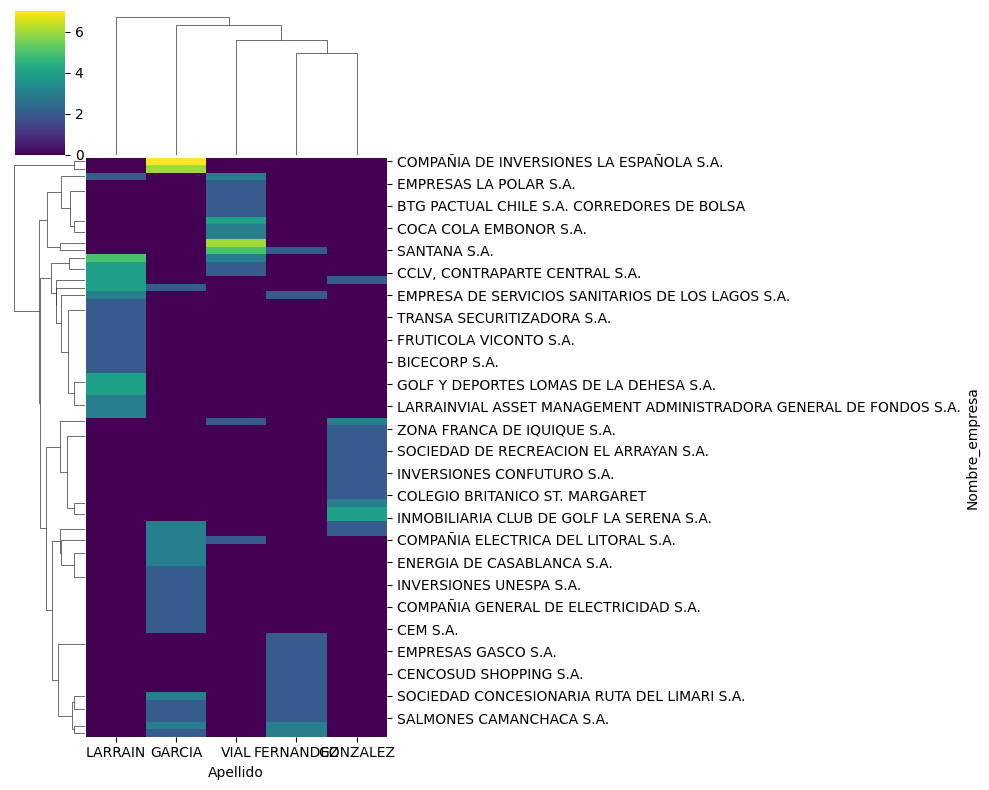

In [218]:
# Transformar a matriz
pivot = most_relevant_surnames.pivot_table(
    index="Nombre_empresa", 
    columns="Apellido", 
    values="conteo", 
    fill_value=0,
)

# Crear el cluster map
sns.clustermap(pivot, cmap="viridis", figsize=(10, 8))

# Mostrar el gráfico
plt.show()

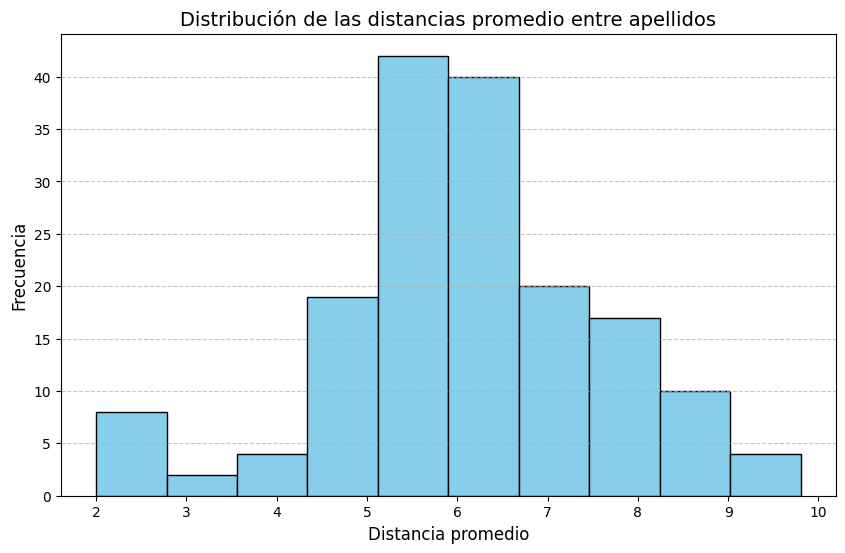

In [219]:
import networkx as nx

# Crear un grafo bipartito
G = nx.Graph()

# Agregar nodos y conexiones
for _, row in relevant_surnames.iterrows():
    empresa = f"Empresa:{row['Nombre_empresa']}"
    apellido = f"Apellido:{row['Apellido']}"
    G.add_node(empresa, tipo="empresa")
    G.add_node(apellido, tipo="apellido")
    G.add_edge(empresa, apellido, weight=row["conteo"])

# Calcular distancia promedio entre apellidos conectados
distancias_promedio = []
apellidos = [n for n, d in G.nodes(data=True) if d["tipo"] == "apellido"]

for apellido in apellidos:
    # Obtener distancias desde este apellido a todos los demás
    distancias = nx.single_source_shortest_path_length(G, apellido)

    # Filtrar para solo incluir otros apellidos
    distancias_apellidos = [
        dist
        for nodo, dist in distancias.items()
        if nodo.startswith("Apellido:") and nodo != apellido
    ]

    if distancias_apellidos == []:
        continue

    promedio = sum(distancias_apellidos) / len(distancias_apellidos)
    distancias_promedio.append(promedio)


plt.figure(figsize=(10, 6))
plt.hist(distancias_promedio, bins=10, color='skyblue', edgecolor='black')
hist, bins = np.histogram(distancias_promedio, bins=10)
plt.title('Distribución de las distancias promedio entre apellidos', fontsize=14)
plt.xlabel('Distancia promedio', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [220]:
df_distancias_promedio = pd.DataFrame.from_dict({
    "Distancia promedio": bins[:-1].tolist(),
    "Frecuencia": hist.tolist()
})

generate_bar_plot_data(
    df=df_distancias_promedio,
    label_column="Distancia promedio",
    count_column="Frecuencia",
    path_to_save=f"{VIS_PATH}/distancias_promedio.json"
)

#### **Entropia de los apellidos en cada empresa según su tamaño**

In [221]:
# 1. Tomamos el dataset original y lo copiamos
entropy_by_company = relevant_surnames.copy()

# 2. Calculamos la probabilidad de cada apellido dentro de cada empresa
entropy_by_company["probabilidad"] = entropy_by_company.groupby("Nombre_empresa")["conteo"].transform(
    lambda x: x / x.sum()
)

# 3. Calcular la entropía de cada apellido
entropy_by_company["entropia_apellido"] = -entropy_by_company["probabilidad"] * np.log2(entropy_by_company["probabilidad"])

# 4. Calcular la entropía total de cada empresa
entropia_por_empresa = entropy_by_company.groupby("Nombre_empresa")["entropia_apellido"].sum().reset_index()

# 5. Calcular la entropía máxima para cada empresa (log2 del número de apellidos únicos)
entropia_por_empresa['n_apellidos'] = entropy_by_company.groupby('Nombre_empresa')['Apellido'].nunique().values
entropia_por_empresa['entropia_maxima'] = np.log2(entropia_por_empresa['n_apellidos'])

# 6. Calcular la entropía normalizada
entropia_por_empresa['entropia_normalizada'] = entropia_por_empresa['entropia_apellido'] / entropia_por_empresa['entropia_maxima']

# 7. Ordenar por entropía normalizada
entropia_por_empresa.sort_values("entropia_normalizada", ascending=False, inplace=True)

# 8. Mostrar las empresas con mayor entropía normalizada
entropia_por_empresa = entropia_por_empresa[["Nombre_empresa", "entropia_normalizada"]]
entropia_por_empresa.head()


,Nombre_empresa,entropia_normalizada
137,INDIVER S.A.,1.0
93,EMPRESA DE LOS FERROCARRILES DEL ESTADO,1.0
192,QUEMCHI S.A.,1.0
188,PORTUARIA CABO FROWARD S.A.,1.0
174,MARITIMA DE INVERSIONES S.A.,1.0


In [222]:
import json

companies_with_size = pd.read_csv(f"{DATA_PATH}/top_surnames_by_company_with_company_size.csv")

# Juntamos el dataset de entropía con el de tamaño de empresa con un inner join
entropy_and_size_by_company = entropia_por_empresa.merge(companies_with_size, on="Nombre_empresa", how="inner")
entropy_and_size_by_company.head()

,Nombre_empresa,entropia_normalizada,Cantidad de apellidos,Tamaño de la compañia
0,COMPAÑIA SUD AMERICANA DE VAPORES S.A.,1.000000,7,GRANDE
1,CONSORCIO FINANCIERO S.A.,1.000000,7,MEDIANA
2,CEMENTO POLPAICO S.A.,0.994014,11,PEQUEÑA
3,COMPAÑIA ELECTRICA DEL LITORAL S.A.,0.992451,6,MICRO
4,SOCIEDAD CONCESIONARIA VESPUCIO NORTE EXPRESS ...,0.980537,7,PEQUEÑA


In [223]:
company_size_color_map = {
    "MICRO": "red",
    "PEQUEÑA": "orange",
    "MEDIANA": "yellow",
    "GRANDE": "green",
}

color_to_rgb = {
    "red": "rgb(255, 0, 0)",
    "orange": "rgb(255, 165, 0)",
    "yellow": "rgb(255, 255, 0)",
    "green": "rgb(0, 128, 0)",
}

# Mapear los tamaños de las compañías a colores
entropy_and_size_by_company["color"] = entropy_and_size_by_company["Tamaño de la compañia"].map(
    company_size_color_map
)
entropy_and_size_by_company["rgb"] = entropy_and_size_by_company["color"].map(color_to_rgb)

entropy_and_size_by_company.head()

,Nombre_empresa,entropia_normalizada,Cantidad de apellidos,Tamaño de la compañia,color,rgb
0,COMPAÑIA SUD AMERICANA DE VAPORES S.A.,1.000000,7,GRANDE,green,"rgb(0, 128, 0)"
1,CONSORCIO FINANCIERO S.A.,1.000000,7,MEDIANA,yellow,"rgb(255, 255, 0)"
2,CEMENTO POLPAICO S.A.,0.994014,11,PEQUEÑA,orange,"rgb(255, 165, 0)"
3,COMPAÑIA ELECTRICA DEL LITORAL S.A.,0.992451,6,MICRO,red,"rgb(255, 0, 0)"
4,SOCIEDAD CONCESIONARIA VESPUCIO NORTE EXPRESS ...,0.980537,7,PEQUEÑA,orange,"rgb(255, 165, 0)"


In [224]:
companies_with_size_dict = (
    entropy_and_size_by_company.rename(
        columns={
            "Nombre_empresa": "x",
            "Cantidad de apellidos": "y",
            "Tamaño de la compañia": "company_size",
            "color": "color",
            "rgb": "rgb",
        }
    )
    .to_dict(orient="list")
)
with open(f"{VIS_PATH}/entropy_and_size_by_company.json", "w") as f:
    json.dump(companies_with_size_dict, f)